In [ ]:
for a, b in zip([1,2,3], [3,4,5]):
    print (a, b)

In [1]:
from pathlib import Path
import sys
import yaml
import time
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

DIR = Path('..')
sys.path.insert(0, str(DIR))
from SCanalyzer import SCanalyzer
from SCanalyzer.busSim import BusSim, Config
from SCanalyzer.busSim.manager import managerFactory
from SCanalyzer.gtfs_edit import edit_double

import gtfs_functions as gtfs
%matplotlib inline

manger init
mangager register
mangager register


In [1]:
a = {'a':1, 'b':2}

['a', 'b']

In [2]:
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs(os.path.join('..', 'data', 'columb','columbus_gtfs.zip'))

(4830000.0, 4895000.0)

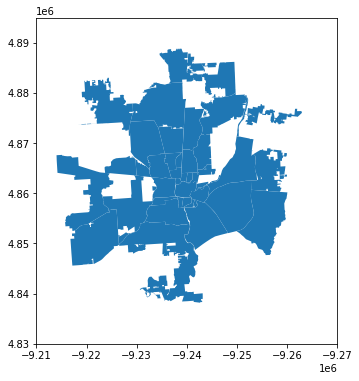

In [3]:
columb_c = gpd.read_file(os.path.join('..','data','columb','Columbus_Communities.shp'))
fire = gpd.read_file(os.path.join('..','data','columb','Central_Ohio_Fire_Stations.shp'))
transp = gpd.read_file(os.path.join('..','data','columb','Transportation_Facilities.shp'))
railroad = gpd.read_file(os.path.join('..','data','columb','Central_Ohio_Railroad_Crossings.shp'))
ax = columb_c.plot(figsize=(6,6))
ax.set_xlim([-9.21*10**6, -9.27*10**6])
ax.set_ylim([4.83*10**6, 4.895*10**6])
# fire.plot(color='red', ax=ax)
# # # transp.plot(color='green', ax=ax)
# railroad.plot(color='yellow', ax=ax)


<AxesSubplot:>

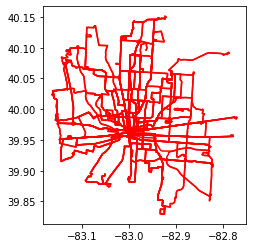

In [4]:
shapes.plot(color='red')

In [5]:
cutoffs = [0,6,9,15.5,19,22,24]
stop_freq = gtfs.stops_freq(stop_times, stops, cutoffs = cutoffs)

In [6]:
cutoffs = [0,6,9,15.5,19,22,24]
line_freq = gtfs.lines_freq(stop_times, trips, shapes, routes, cutoffs = cutoffs)

In [14]:
condition_dir = line_freq.dir_id == 'Inbound'
condition_window = line_freq.window == '6:00-9:00'

gdf = line_freq.loc[(condition_dir & condition_window),:].reset_index()

gtfs.map_gdf(gdf = gdf, 
              variable = 'ntrips', 
              colors = ['green', 'blue', 'yellow', 'red', 'orange', 'black'],
#               colors = ["#d13870", "#e895b3" ,'#55d992', '#3ab071', '#0e8955','#066a40'], 
              tooltip_var = ['route_name'] , 
              tooltip_labels = ['Route: '], 
              breaks = [5, 10, 20, 50])

In [12]:
condition_dir = stop_freq.dir_id == 'Inbound'
condition_window = stop_freq.window == '6:00-9:00'
gdf = stop_freq.loc[(condition_dir & condition_window),:].reset_index()

gtfs.map_gdf(gdf = gdf, 
              variable = 'ntrips', 
              colors = ["#d13870", "#e895b3" ,'#55d992', '#3ab071', '#0e8955','#066a40'], 
              tooltip_var = ['frequency'] , 
              tooltip_labels = ['Frequency: '], 
              breaks = [10, 20, 30, 40, 50, 60])